# Gloabal Housing Market Regression Analysis Project 

##### 1. Introduction
##### 2. Data Loading & Manipulation
##### 3. Exploratory Data Analysis (EDA)
##### 4. Data Modelling
##### 5. Model Evaluation
##### 6. Conclusion

# 1. Introduction

This project analyzes global housing market trends across multiple countries—including the USA, UK, India, and UAE—using data from 2014 to 2025. The primary objective is to uncover insights into housing affordability, price dynamics, and macroeconomic relationships by leveraging data preprocessing, exploratory data analysis (EDA), and predictive modeling.

Through feature engineering and visualization, the analysis explores key indicators such as the House Price Index (HPI), Rent Index, Mortgage Rate, Inflation, GDP Growth, and Affordability Ratio. Machine learning models are then used to evaluate the influence of these features on housing prices.

The final goal is to predict the House Price Index, identify the most influential economic drivers, and provide interpretable insights to understanding real estate market dynamics on a global scale.

Tools & Techniques Used:

- Python Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

- Modeling: Linear Regression, Random Forest, Decision Tree

- Target Variable: House Price Index

- Key Features: Country, Year, Rent Index, Affordability Ratio, GDP Growth, Mortgage Rate, etc.

# 2. Data Loading & Manipulation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Datasets/global_housing_market_dataset.csv")

In [3]:
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [4]:
df.tail()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520
199,UAE,2024,153.743377,85.855534,9.122050,1.708365,1.051148,3.730587,-0.747705,62.137702,70.968678


In [5]:
df.shape

(200, 11)

In [6]:
df.isna().sum()

Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,200,20,USA,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,200.0,NaN,NaN,NaN,2019.5,2.879489,2015.0,2017.0,2019.5,2022.0,2024.0
House Price Index,200.0,NaN,NaN,NaN,130.381022,28.752229,80.552212,104.142562,129.193653,157.127098,179.971767
Rent Index,200.0,NaN,NaN,NaN,83.04837,21.439858,50.354311,60.466671,83.721711,100.604665,119.855388
Affordability Ratio,200.0,NaN,NaN,NaN,7.237768,2.576085,3.041688,5.034207,7.375697,9.276196,11.879671
Mortgage Rate (%),200.0,NaN,NaN,NaN,4.150621,1.380222,1.537814,3.045278,4.329643,5.217706,6.485623
Inflation Rate (%),200.0,NaN,NaN,NaN,3.649756,1.881938,0.53211,1.939199,3.664625,5.26172,6.912349
GDP Growth (%),200.0,NaN,NaN,NaN,2.133722,2.41327,-1.921833,-0.095628,2.307548,4.272776,5.958931
Population Growth (%),200.0,NaN,NaN,NaN,0.722806,1.035691,-0.961391,-0.18332,0.722372,1.621317,2.497948
Urbanization Rate (%),200.0,NaN,NaN,NaN,74.769891,8.734246,60.17276,66.923842,75.10006,82.67743,89.788944


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


In [10]:
# Group the dataset by 'Country' and compute the mean of each numeric column
# This helps in understanding average values per country for further comparison or visualization
df_avg = df.groupby("Country").mean().reset_index()

In [11]:
df_avg.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,Australia,2019.5,135.752524,75.269638,6.359994,3.899384,4.172188,2.491301,0.559129,70.573952,106.116399
1,Brazil,2019.5,143.080085,88.799770,5.822374,4.779715,3.506565,1.194939,1.383479,75.138110,120.611901
2,Canada,2019.5,112.084824,86.148975,6.694199,4.186981,4.271797,2.084625,0.382892,74.721454,108.782593
3,China,2019.5,123.808752,86.591358,6.122026,3.812316,3.479395,1.552549,0.828688,70.480125,106.006040
4,France,2019.5,139.344904,75.032904,6.114604,4.635595,4.036440,2.671839,1.315331,78.185380,96.771181


In [12]:
df_avg.shape

(20, 11)

In [13]:
df.columns

Index(['Country', 'Year', 'House Price Index', 'Rent Index',
       'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)',
       'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)',
       'Construction Index'],
      dtype='object')

In [14]:
df_avg.columns

Index(['Country', 'Year', 'House Price Index', 'Rent Index',
       'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)',
       'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)',
       'Construction Index'],
      dtype='object')

# 3. EDA(Exploratory Data Analysis) Analysis

In [15]:
# Drop non-numeric or non-relevant columns ('Country' and 'Year') to isolate only numeric features
numeric_cols = df_avg.drop(columns=['Country', 'Year'])
numeric_cols.columns

Index(['House Price Index', 'Rent Index', 'Affordability Ratio',
       'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
       'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'],
      dtype='object')

## 3.1. Bar Plot

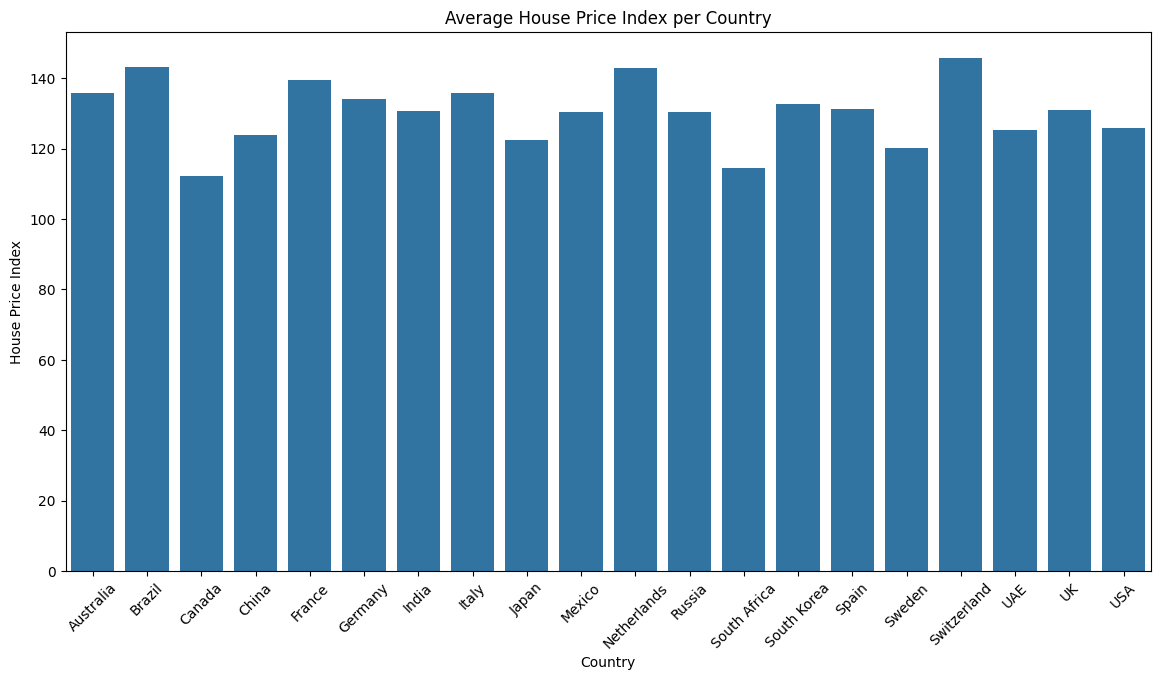

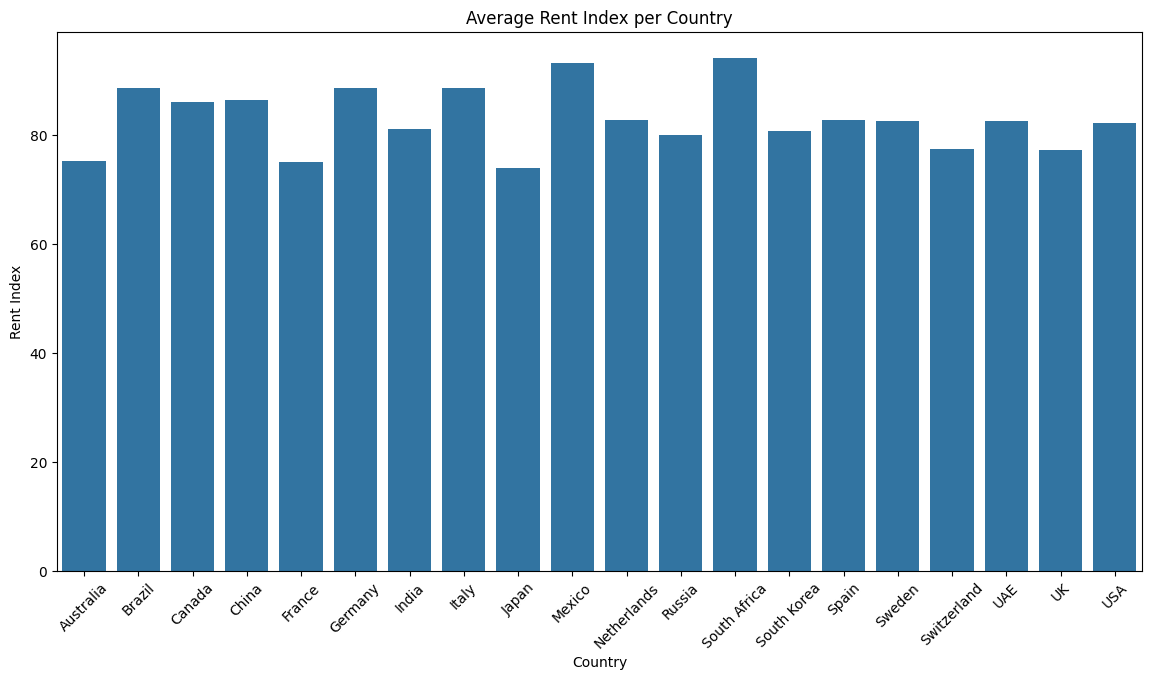

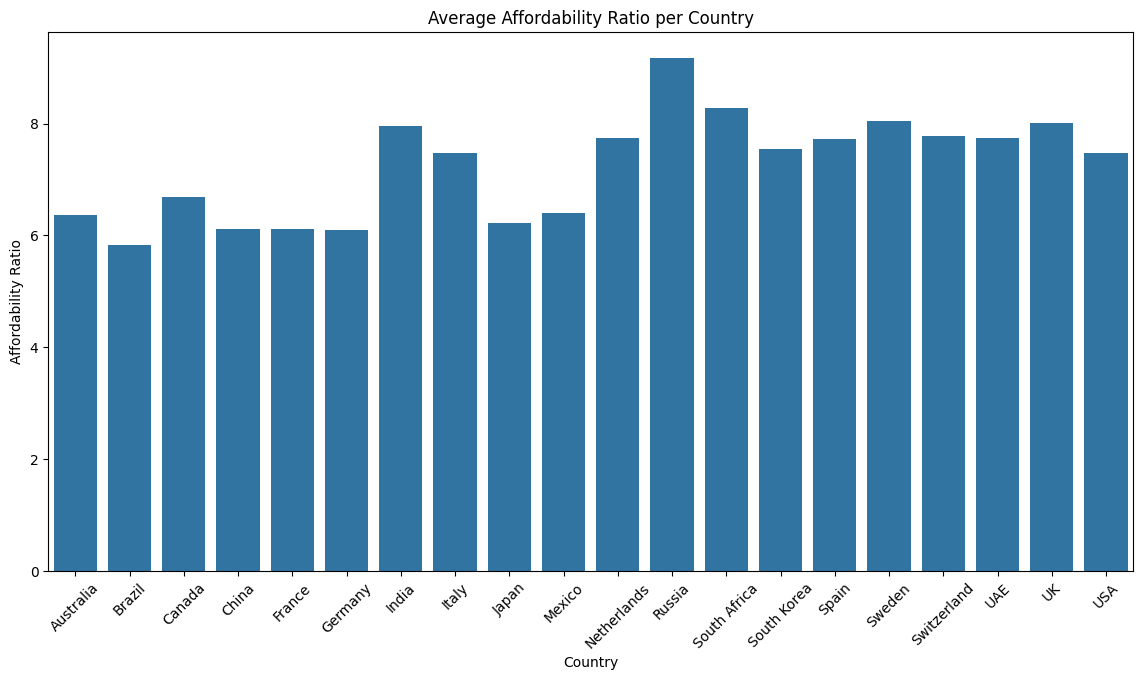

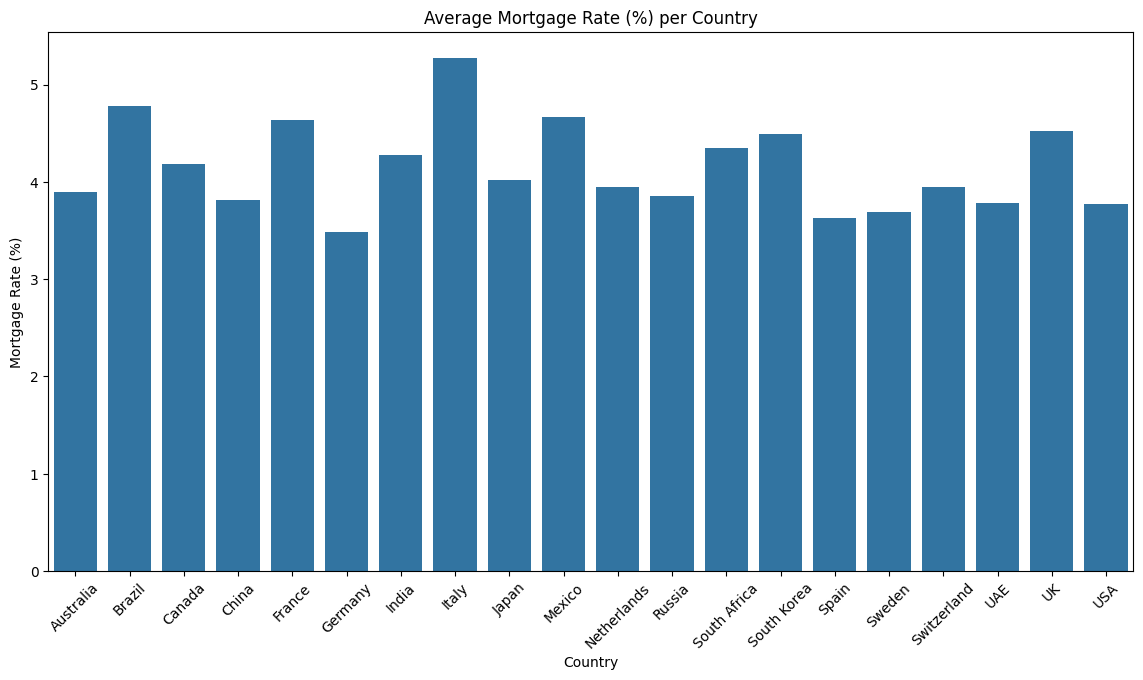

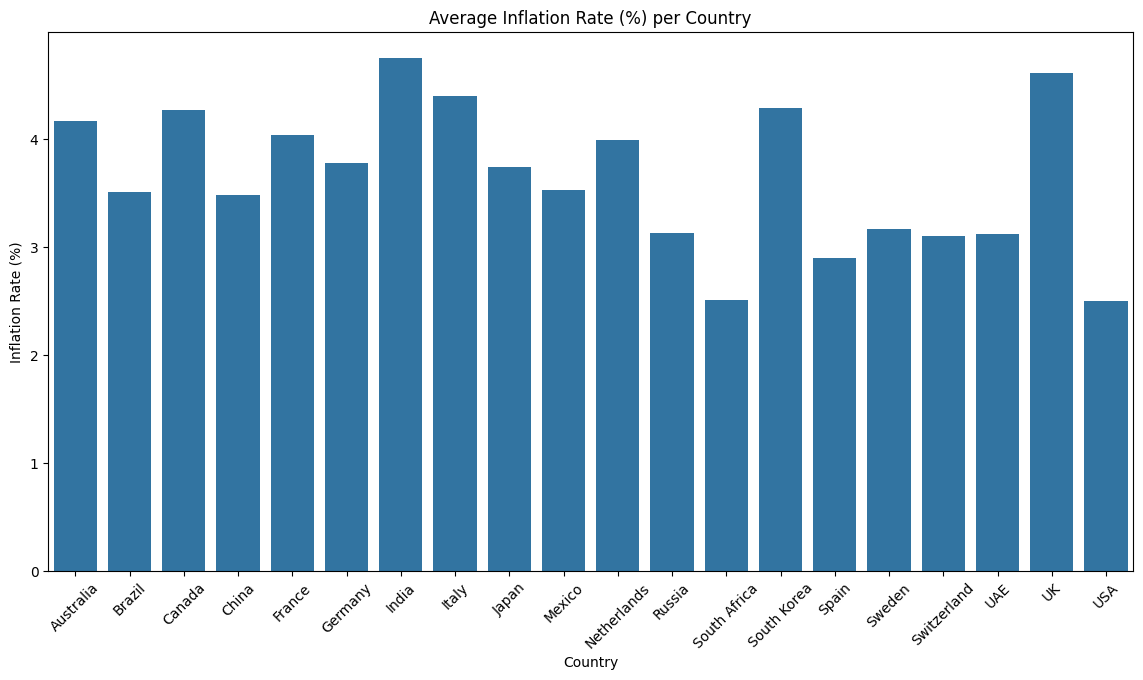

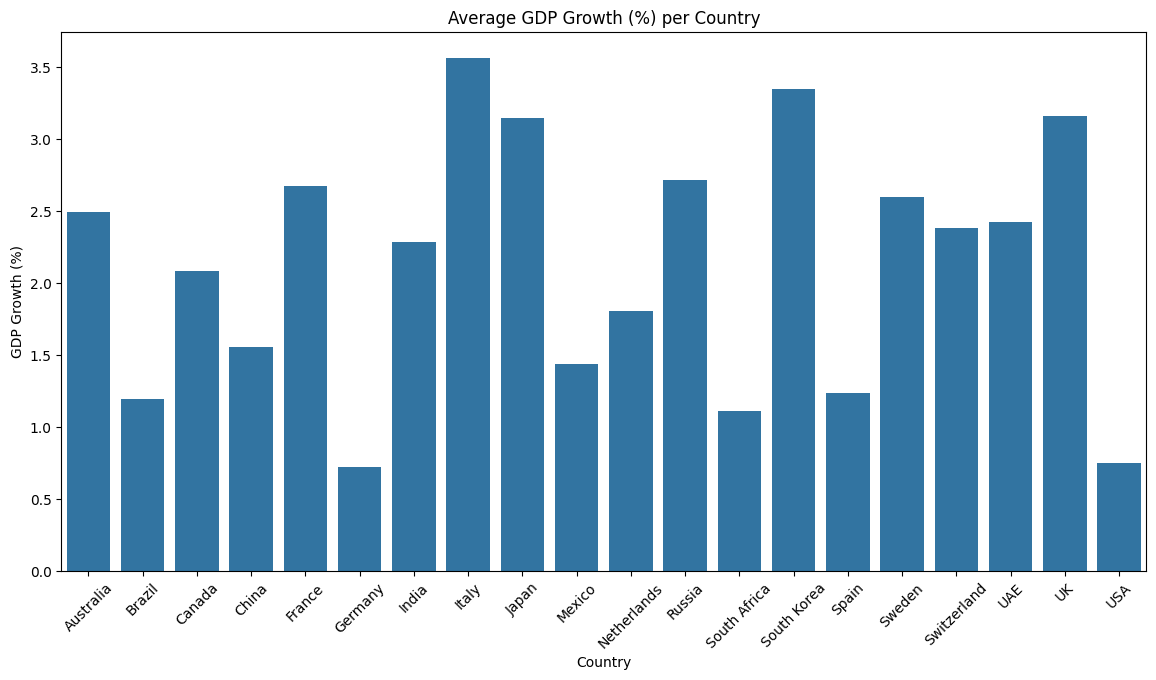

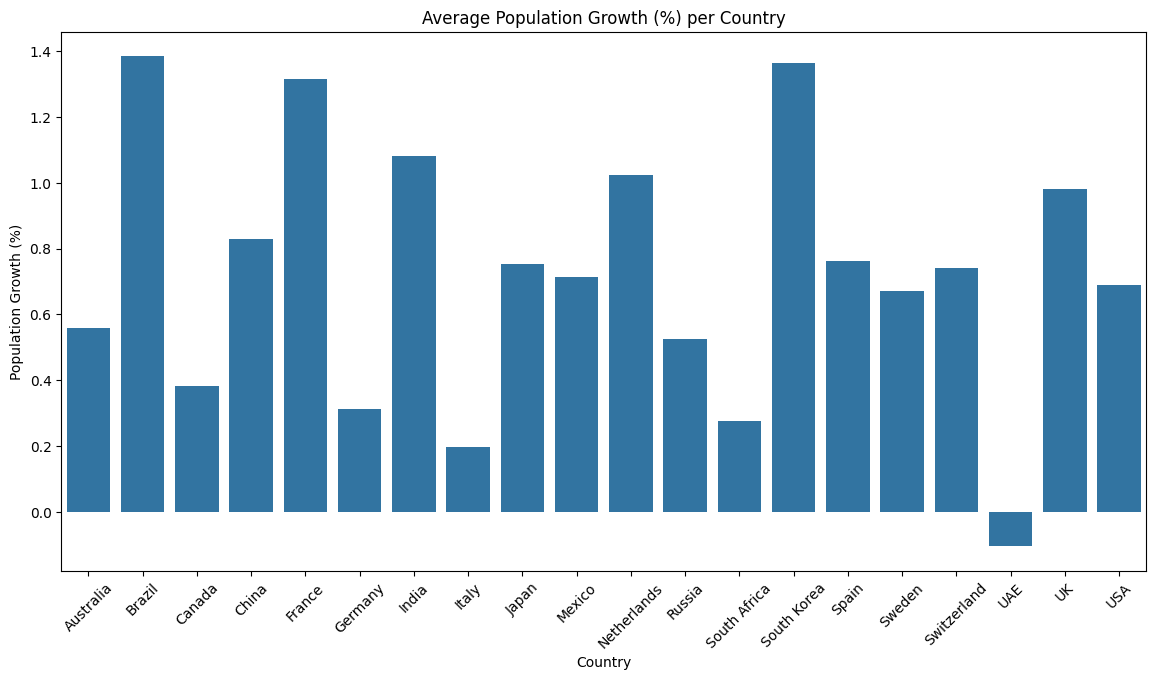

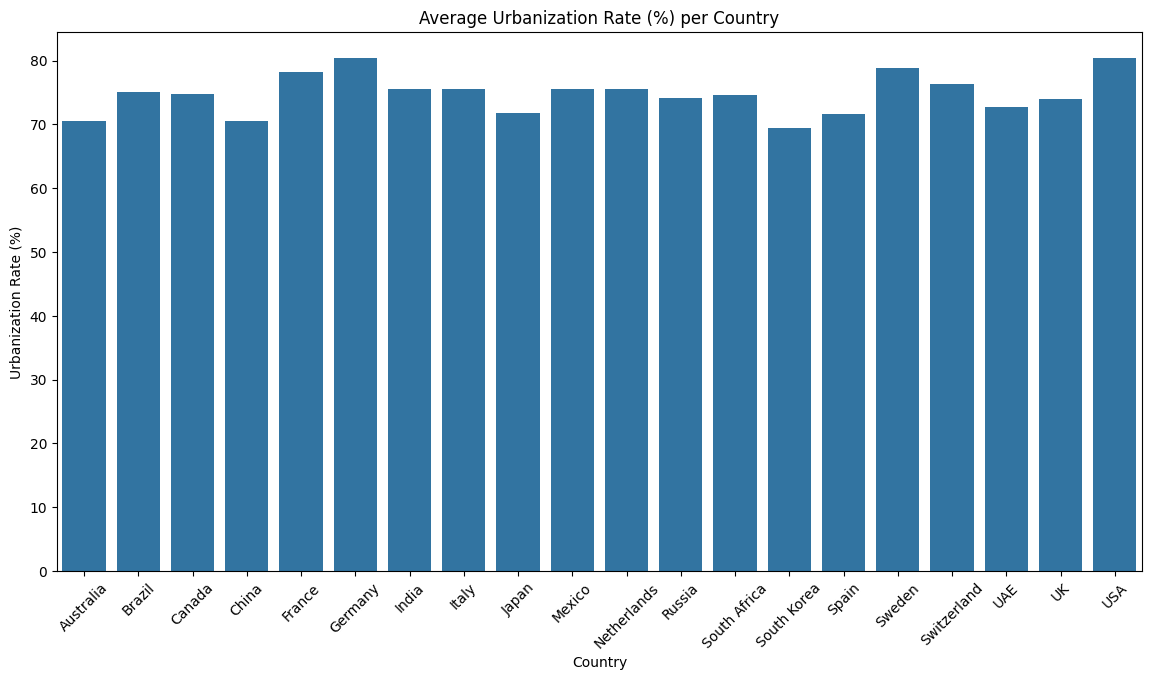

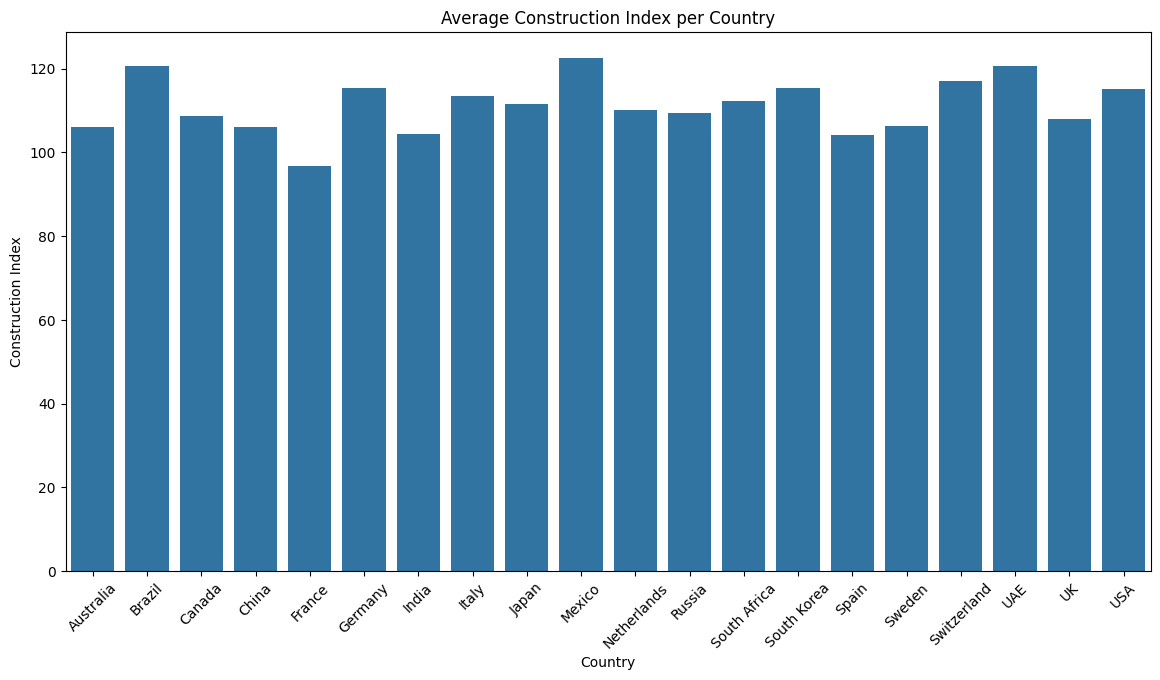

In [16]:
for col in numeric_cols[:]:
    plt.figure(figsize=(14,7))
    sns.barplot(x='Country', y=col, data=df_avg) 
    plt.title(f'Average {col} per Country')
    plt.xticks(rotation=45)
    plt.show()

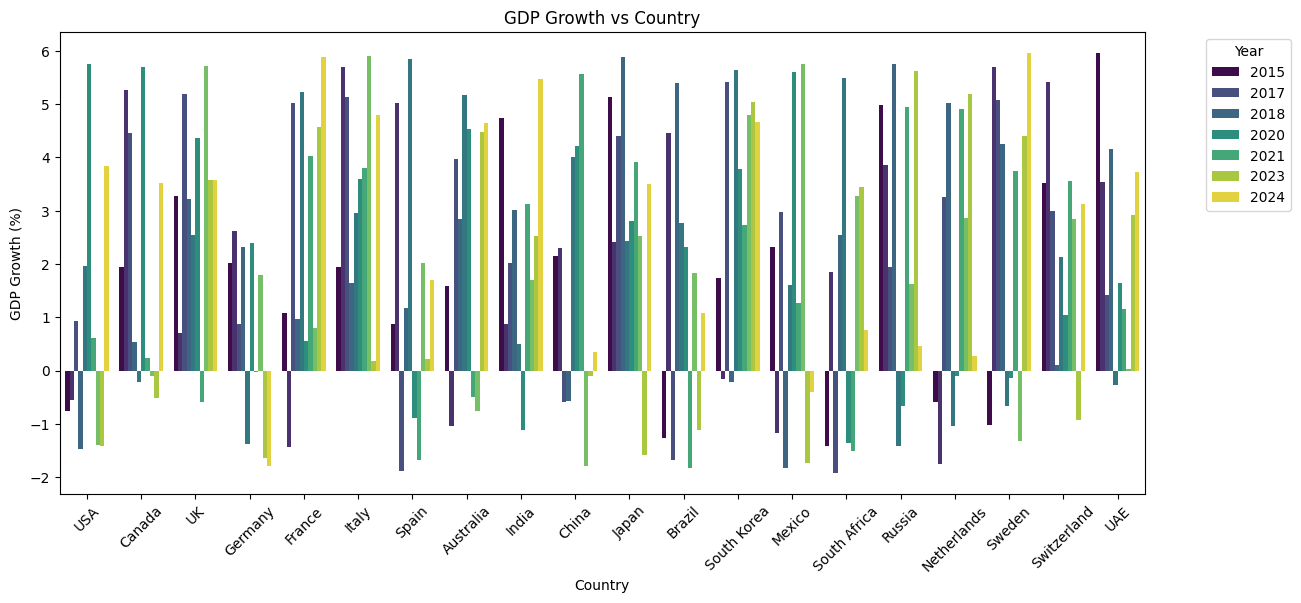

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Country', y='GDP Growth (%)', hue='Year', palette='viridis')
plt.xticks(rotation=45)
plt.title("GDP Growth vs Country")
plt.xlabel("Country")
plt.ylabel("GDP Growth (%)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3.2. Line Plot

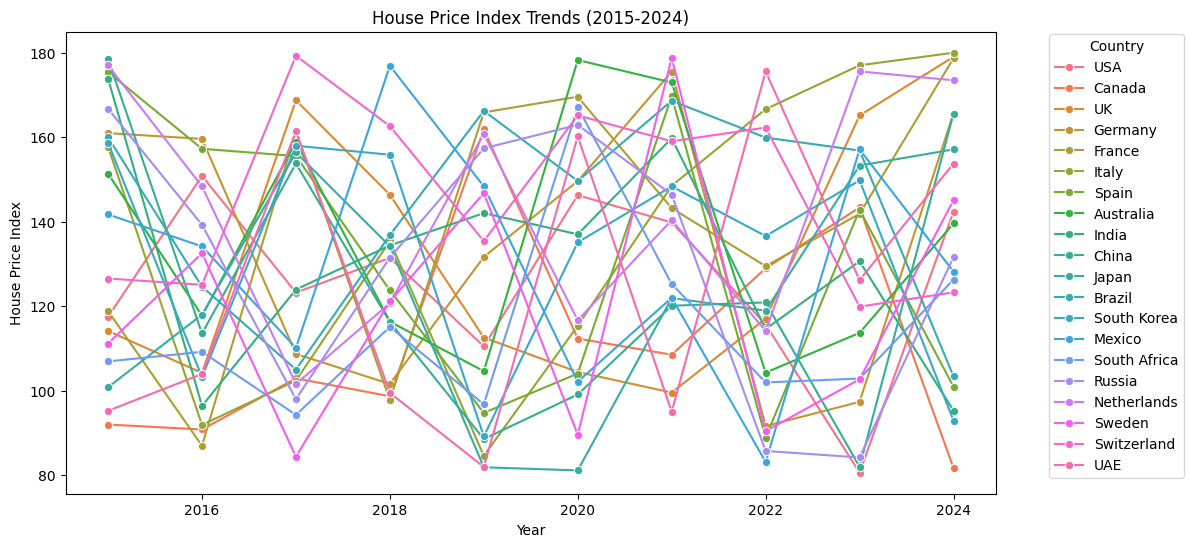

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='House Price Index', hue='Country', marker="o")
plt.title("House Price Index Trends (2015-2024)")
plt.xlabel("Year")
plt.ylabel("House Price Index")
plt.legend(title="Country", bbox_to_anchor=(1.05,1.01), loc='upper left')
plt.show()
sns.set_style("darkgrid")

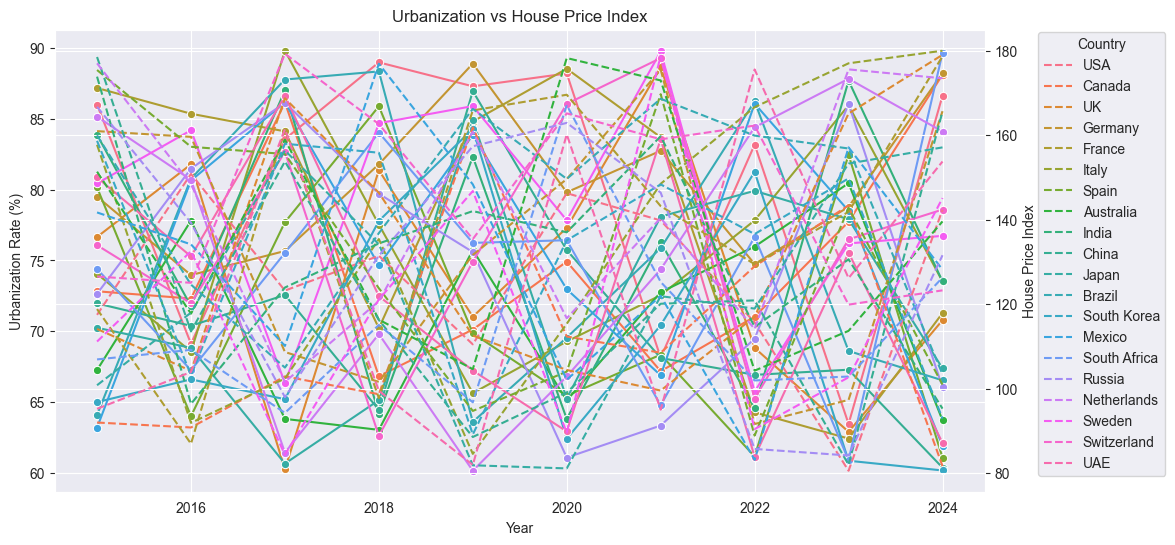

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Year', y='Urbanization Rate (%)', hue='Country', ax=ax1, marker='o', legend=False)
sns.lineplot(data=df, x='Year', y='House Price Index', hue='Country', ax=ax2, linestyle='dashed')
ax1.set_ylabel("Urbanization Rate (%)")
ax2.set_ylabel("House Price Index")
plt.title("Urbanization vs House Price Index")
plt.legend(title="Country", bbox_to_anchor=(1.05,1.01), loc='upper left')
plt.show()

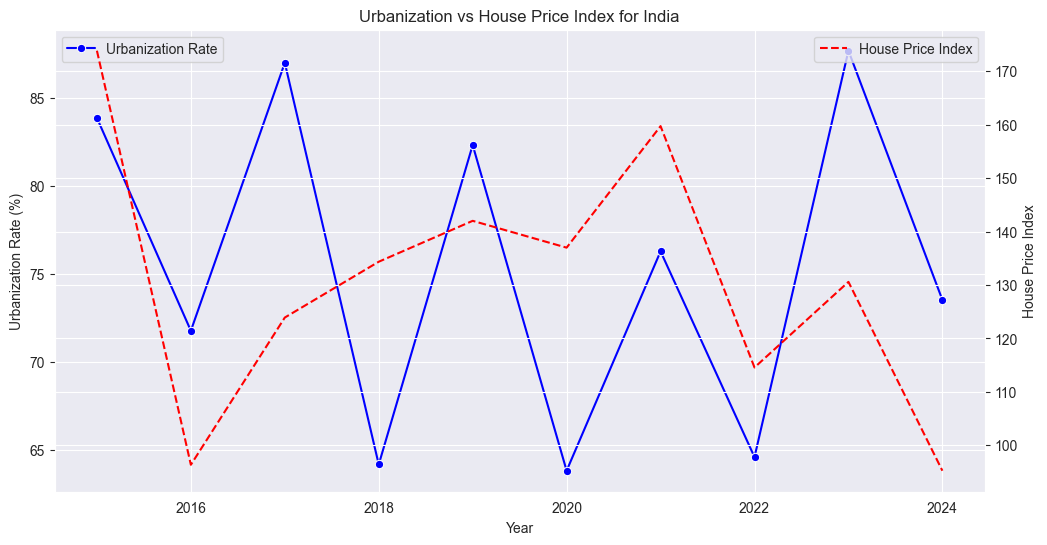

In [20]:
country = "India"
df_filtered = df[df["Country"] == country]
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
sns.lineplot(data=df_filtered, x='Year', y='Urbanization Rate (%)', ax=ax1, marker='o', color='b', label="Urbanization Rate")
sns.lineplot(data=df_filtered, x='Year', y='House Price Index', ax=ax2, linestyle='dashed', color='r', label="House Price Index")
ax1.set_ylabel("Urbanization Rate (%)")
ax2.set_ylabel("House Price Index")
plt.title(f"Urbanization vs House Price Index for {country}")
plt.show()

## 3.3. Scatter Plot

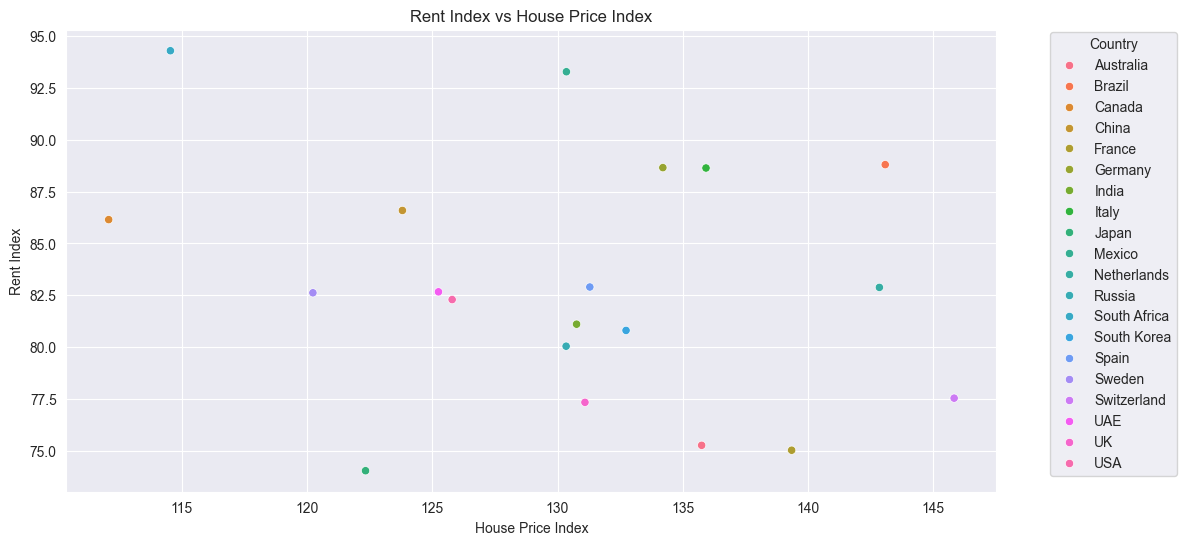

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_avg, x='House Price Index', y='Rent Index', hue='Country', alpha=1)
plt.title("Rent Index vs House Price Index")
plt.xlabel("House Price Index")
plt.ylabel("Rent Index")
plt.legend(title="Country", bbox_to_anchor=(1.05,1.01), loc='upper left')
plt.show()

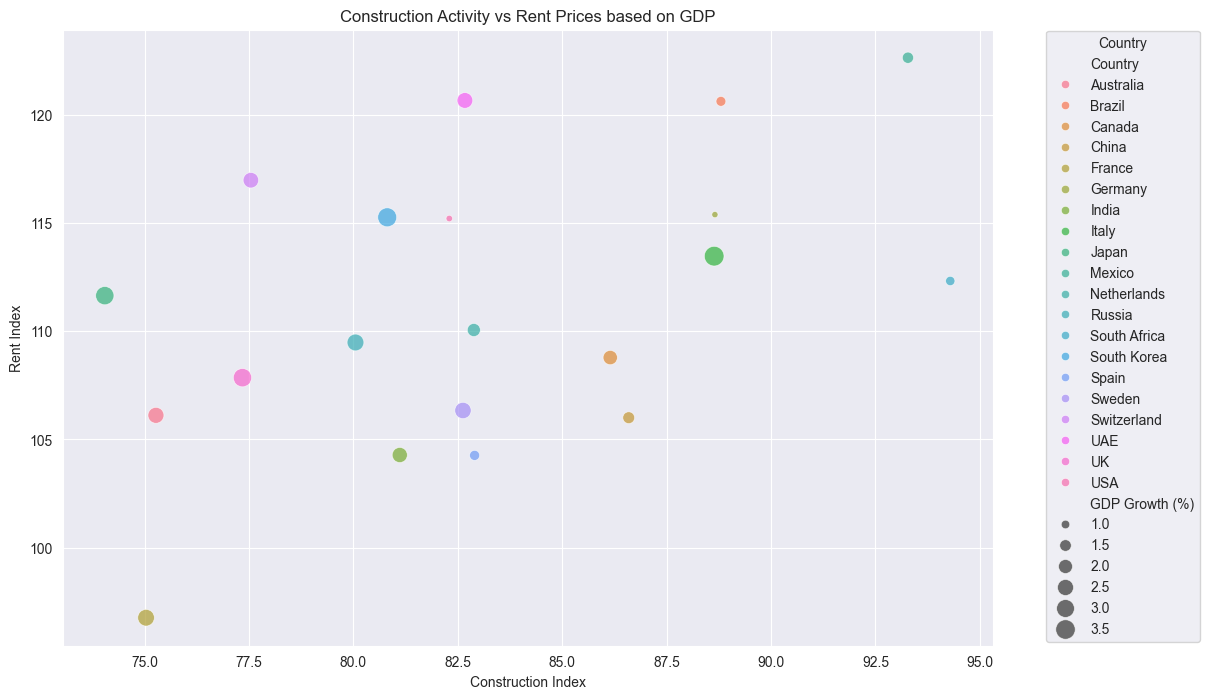

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_avg, x='Rent Index', y='Construction Index', hue='Country', size='GDP Growth (%)', sizes=(20, 200), alpha=0.7)
plt.title("Construction Activity vs Rent Prices based on GDP")
plt.xlabel("Construction Index")
plt.ylabel("Rent Index")
plt.legend(title="Country", bbox_to_anchor=(1.05,1.01), loc='upper left')
plt.show()

## 3.4. Box Plot

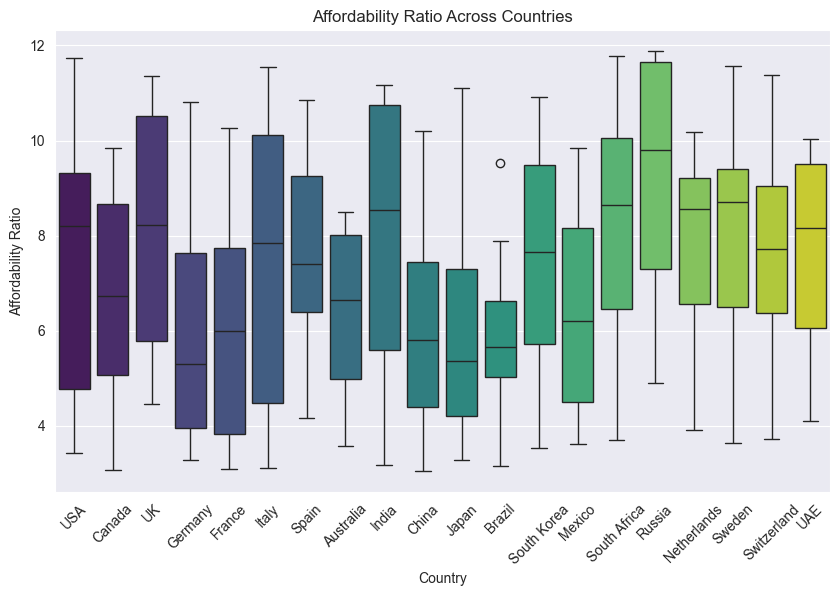

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='Affordability Ratio', hue='Country', palette='viridis')
plt.xticks(rotation=45)
plt.title("Affordability Ratio Across Countries")
plt.xlabel("Country")
plt.ylabel("Affordability Ratio")
plt.show()

## 3.5. Regression Plot

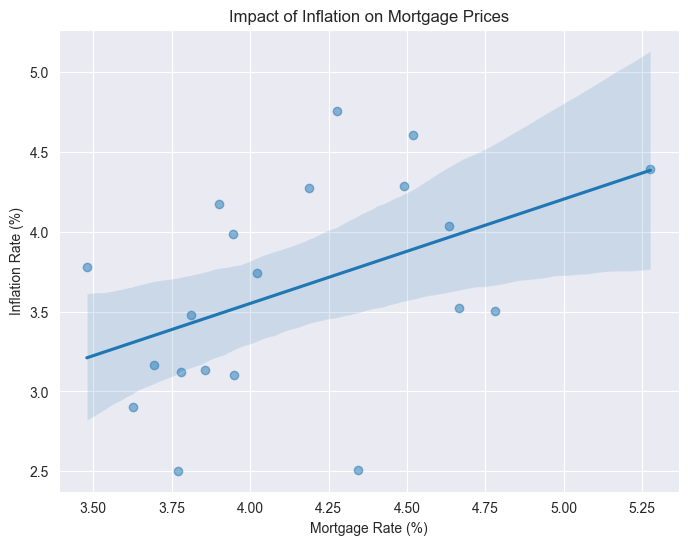

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_avg, y='Inflation Rate (%)', x='Mortgage Rate (%)', scatter_kws={'alpha':0.5})
plt.title("Impact of Inflation on Mortgage Prices")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Mortgage Rate (%)")
plt.show()

## 3.6. Heat Map

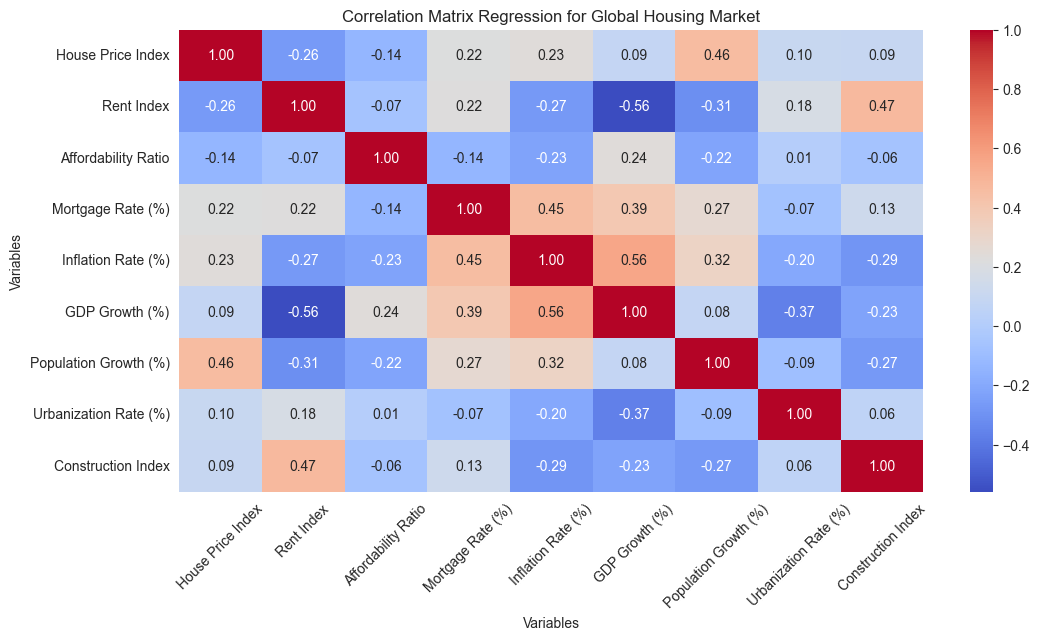

In [25]:
plt.figure(figsize=(12, 6))
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix Regression for Global Housing Market")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks(rotation=45)
plt.show()

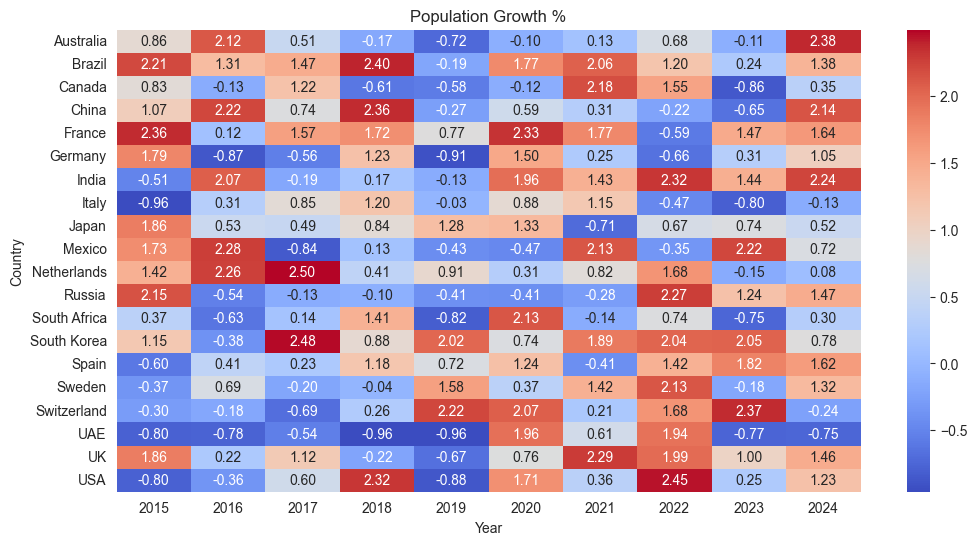

In [26]:
plt.figure(figsize=(12, 6))
pivot_df = df.pivot_table(index="Country", columns="Year", values="Population Growth (%)")
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Population Growth %")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

# 4. Data Modelling

## 4.1. Encoding Features

In [27]:
# One-hot encode the 'Country' column to convert categorical values into binary columns
encoded_df = pd.get_dummies(df[['Country']], drop_first=True, dtype=int)  # dtype=int ensures encoded values are stored as integers (0 or 1)
encoded_df

,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Mexico,Country_Netherlands,Country_Russia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UAE,Country_UK,Country_USA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 4.2. Splitting Data

In [28]:
# Define feature X and target y
# We aim to predict 'House Price Index', so we drop it from the features
X = df.drop(['House Price Index'], axis=1) # Features (independent variables)
y = df['House Price Index']                # Target (dependent variable)

# Split the dataset into training and testing sets
# 70% of the data will be used for training, and 30% for testing
# Setting random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4.3. Scaling Featues

In [29]:
# Drop the 'Country' column before scaling since it's a categorical variable and has likely been one-hot encoded separately.
features_to_scale_train = X_train.drop(['Country'], axis=1)
features_to_scale_test = X_test.drop(['Country'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
# Important: Always fit on training data only to prevent data leakage
scaled_features_train = scaler.fit_transform(features_to_scale_train)
scaled_features_test = scaler.transform(features_to_scale_test)

# Convert the scaled arrays back into DataFrames with appropriate column names
scaled_features_train_df = pd.DataFrame(scaled_features_train, columns=features_to_scale_train.columns)
scaled_features_test_df = pd.DataFrame(scaled_features_test, columns=features_to_scale_test.columns)

## 4.4. Linear Regression

In [30]:
# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model using the scaled training features and actual target values
model_lr.fit(scaled_features_train_df, y_train)

# Predict the House Price Index on the scaled test dataset
y_pred_lr = model_lr.predict(scaled_features_test_df)

In [31]:
# Calculate performance metrics 
r2_lr = r2_score(y_test, y_pred_lr)            # Coefficient of determination (R²)
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error
rmse_lr = mse_lr**0.5                          # Root Mean Squared Error

print(f"R² Score: {r2_lr:.3f}\n")
print(f"Mean Squared Error: {mse_lr:.3f}\n")
print(f"Root Mean Squared Error: {rmse_lr:.3f}\n")

R² Score: -0.012

Mean Squared Error: 945.642

Root Mean Squared Error: 30.751



## 4.5. Decision Tree

In [32]:
# Initialize the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(scaled_features_train_df, y_train)

# Predict the House Price Index
y_pred_dt = model_dt.predict(scaled_features_test_df)

In [33]:
# Calculate performance metrics 
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt**0.5

print(f"R² Score: {r2_dt:.3f}\n")
print(f"Mean Squared Error: {mse_dt:.3f}\n")
print(f"Root Mean Squared Error: {rmse_dt:.3f}\n")

R² Score: -0.417

Mean Squared Error: 1324.251

Root Mean Squared Error: 36.390



## 4.6. Random Forest

In [34]:
# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(scaled_features_train_df, y_train)

# Predict the House Price Index
y_pred_rf = model_rf.predict(scaled_features_test_df)

In [35]:
# Calculate performance metrics 
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5

print(f"R² Score: {r2_rf:.3f}\n")
print(f"Mean Squared Error: {mse_rf:.3f}\n")
print(f"Root Mean Squared Error: {rmse_rf:.3f}\n")

R² Score: -0.073

Mean Squared Error: 1002.714

Root Mean Squared Error: 31.666



# 5. Evaluation Metrics

## 5.1. Feature Importance

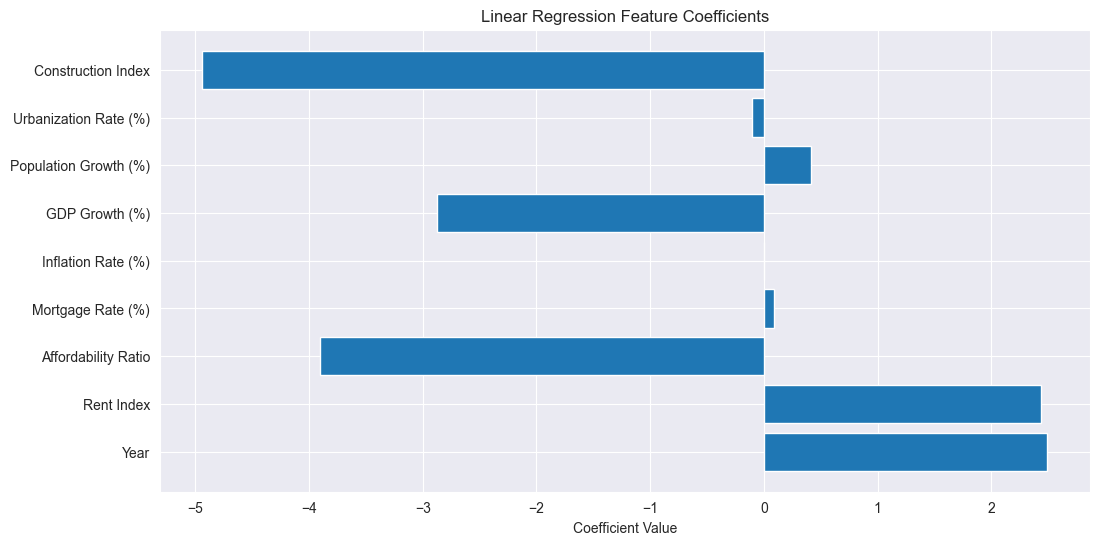

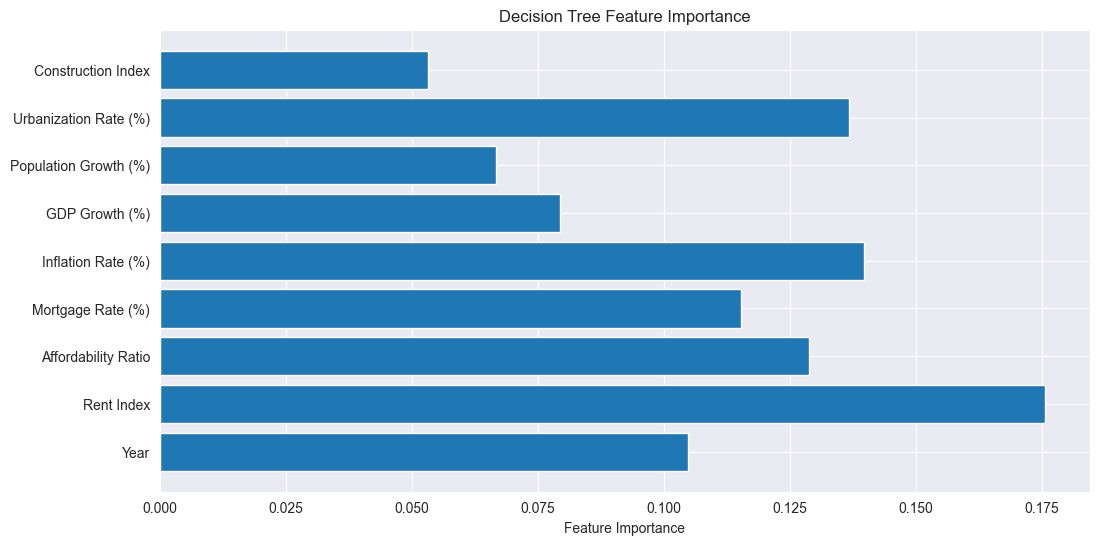

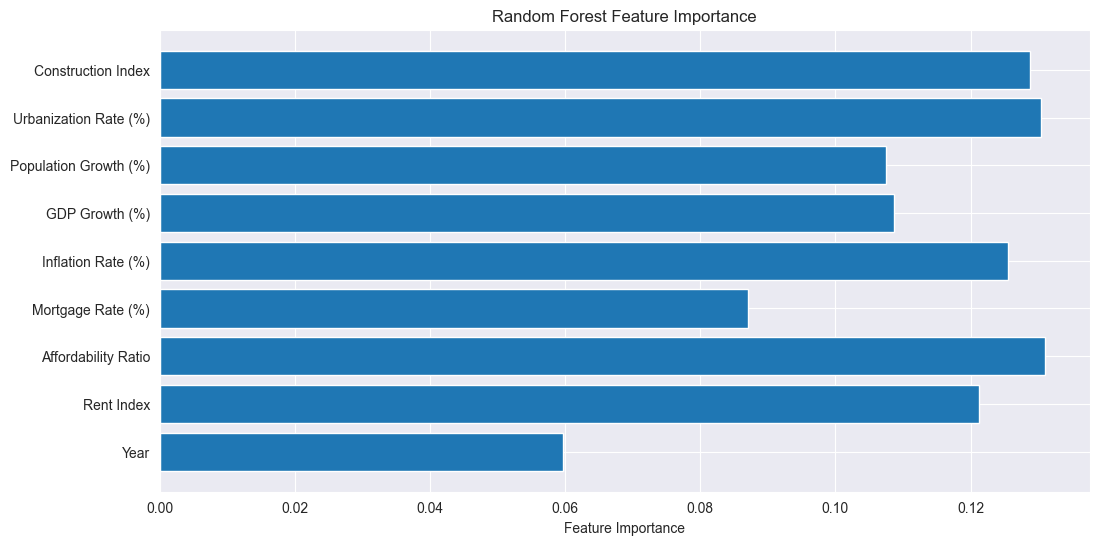

In [36]:
# Linear Regression Coefficients
plt.figure(figsize=(12, 6))
coefs_lr = model_lr.coef_
features_lr = scaled_features_train_df.columns
plt.barh(features_lr, coefs_lr)
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Feature Coefficients")
plt.show()

# Decision Tree Feature Importances
plt.figure(figsize=(12, 6))
importances_dt = model_dt.feature_importances_
features_dt = scaled_features_train_df.columns
plt.barh(features_dt, importances_dt)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

# Random Forest Feature Importances
plt.figure(figsize=(12, 6))
importances_rf = model_rf.feature_importances_
features_rf = scaled_features_train_df.columns
plt.barh(features_rf, importances_rf)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

## 5.2. Residuals

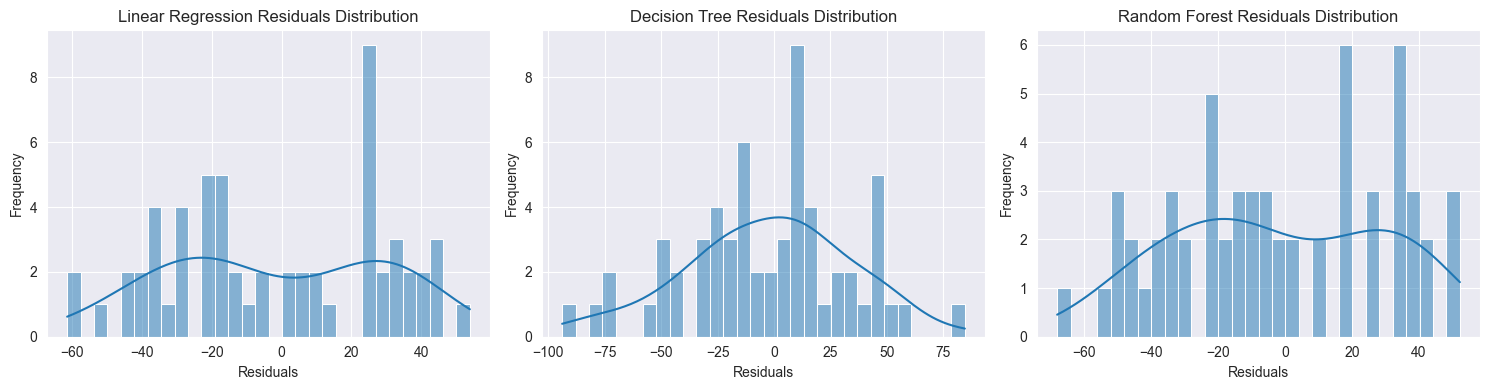

In [37]:
# Residual Analysis for All Models
residuals_lr = y_test - y_pred_lr
residuals_dt = y_test - y_pred_dt
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(residuals_lr, kde=True, bins=30)
plt.title('Linear Regression Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(residuals_dt, kde=True, bins=30)
plt.title('Decision Tree Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title('Random Forest Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6. Conclusion

This project offered a comprehensive look into the global housing market across various countries using data from 2014 to 2025. The analysis highlighted how macroeconomic indicators such as GDP Growth, Mortgage Rates, Inflation, and Affordability Ratios interact with housing prices, and how these relationships vary by region.

Key findings from the project include:

- Affordability Ratio, GDP Growth, and Rent Index emerged as the most influential factors in determining the House Price Index (HPI), as shown by both linear regression coefficients and tree-based model feature importances.

- Mortgage Rate and Inflation Rate showed weak to moderate inverse relationships with HPI, supporting the hypothesis that higher borrowing costs and inflation can suppress housing demand.

- Urbanization Rate and Construction Index were consistently important across all models, indicating that infrastructure expansion and urban development are closely tied to housing market trends.

- Linear Regression revealed clear directional influence, where a higher Affordability Ratio and GDP Growth positively impacted HPI, while Construction Index showed a strong negative coefficient, possibly due to supply-side effects.

Decision Tree and Random Forest models demonstrated the ability to capture non-linear relationships, though overall model accuracy remained modest:

    - Linear Regression: R² = -0.012, RMSE ≈ 30.75

    - Decision Tree: R² = -0.417, RMSE ≈ 36.39

    - Random Forest: R² = -0.073, RMSE ≈ 31.67

- The negative R² scores across models imply that simple regression-based models struggle to capture the complex, multi-country dynamics influencing housing prices. This points to the need for more advanced techniques.

- Residual analysis showed that all models struggled with prediction accuracy, evident in wide-spread and non-normal residual distributions, suggesting room for improvement through either feature engineering or advanced models.

- Going forward, improving feature selection, incorporating lag variables, or exploring LSTM and gradient boosting models may offer better predictive performance in capturing housing market trends across different regions.

Overall, the project successfully demonstrated how data-driven modeling and visualization can uncover meaningful insights into global real estate trends. These insights can help make informed decisions about housing policies, investments, and economic planning